<a href="https://colab.research.google.com/github/Philipof/PredictiveAnalytics/blob/master/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving heart.csv to heart (2).csv


# **Data Pre-processing**

In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
df.shape

(918, 12)

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
print(df.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [ ]:
model_features = df.columns.drop('HeartDisease')
model_target = 'HeartDisease'

print('Model features: ', model_features)
print('Model target: ', model_target)

Model features:  Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')
Model target:  HeartDisease


In [ ]:
import numpy as np
numerical_features_all = df[model_features].select_dtypes(include=np.number).columns
categorical_features_all = df[model_features].select_dtypes(include='object').columns




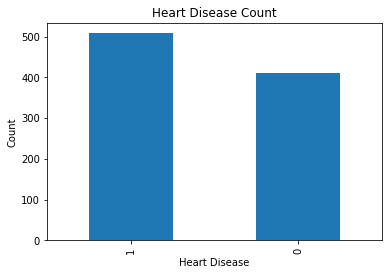

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

df[model_target].value_counts().plot.bar(
title="Heart Disease Count", xlabel='Heart Disease', ylabel='Count')
plt.show()

Age


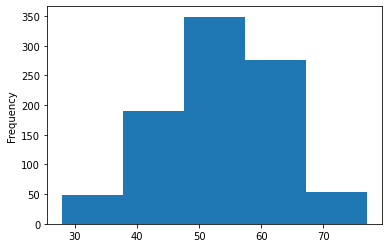

RestingBP


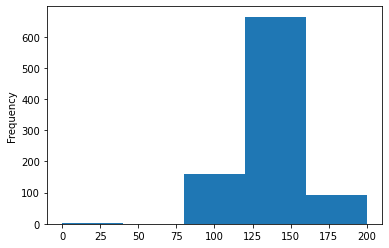

Cholesterol


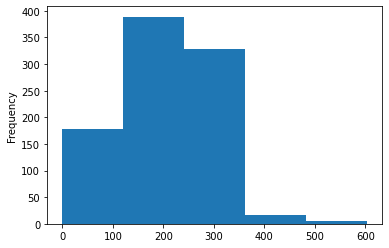

FastingBS


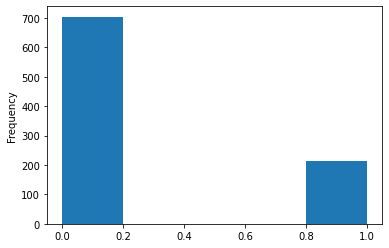

MaxHR


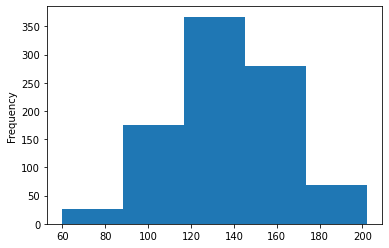

Oldpeak


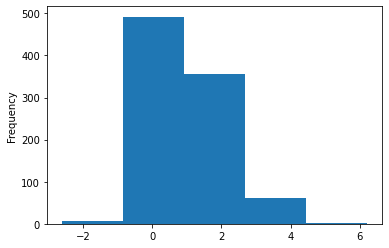

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in numerical_features_all:
    print(c)
    df[c].plot.hist(bins=5)
    plt.show()

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.shape

(918, 16)

In [ ]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


# **Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, shuffle=True, random_state=23)

In [ ]:
print('Training set shape:', train_data.shape)

print('Class 0 samples in the training set:', sum(train_data[model_target] == 0))
print('Class 1 samples in the training set:', sum(train_data[model_target] == 1))

print('Class 0 samples in the test set:', sum(test_data[model_target] == 0))
print('Class 1 samples in the test set:', sum(test_data[model_target] == 1))

Training set shape: (734, 16)
Class 0 samples in the training set: 328
Class 1 samples in the training set: 406
Class 0 samples in the test set: 82
Class 1 samples in the test set: 102


In [ ]:
from sklearn.utils import shuffle

class_0_no = train_data[train_data[model_target] == 0]
class_1_no = train_data[train_data[model_target] == 1]

upsampled_class_0_no = class_0_no.sample(n=len(class_1_no), replace=True, random_state=42)

train_data = pd.concat([class_1_no, upsampled_class_0_no])
train_data = shuffle(train_data)

In [ ]:
print('Training set shape:', train_data.shape)

print('Class 1 samples in the training set:', sum(train_data[model_target] == 1))
print('Class 0 samples in the training set:', sum(train_data[model_target] == 0))

Training set shape: (812, 16)
Class 1 samples in the training set: 406
Class 0 samples in the training set: 406


# **KNN**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

### PIPELINE ###
################

# Pipeline desired data transformers, along with an estimator at the end
# For each step specify: a name, the actual transformer/estimator with its parameters
classifier = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('estimator', KNeighborsClassifier(n_neighbors = 5))
])

# Visualize the pipeline
# This will come in handy especially when building more complex pipelines, stringing together multiple preprocessing steps
from sklearn import set_config
set_config(display='diagram')
classifier

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('estimator', KNeighborsClassifier())])

In [ ]:
# Get train data to train the classifier
X_train = train_data[numerical_features_all]
y_train = train_data[model_target]

# Fit the classifier to training data
# Train data going through the Pipeline it's first imputed, then scaled, and finally used to fit the estimator
classifier.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('estimator', KNeighborsClassifier())])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Use the fitted model to make predictions on the train dataset
# Train data going through the Pipeline it's first imputed (with means from the train), scaled (with the min/max from the train data), and finally used to make predictions
train_predictions = classifier.predict(X_train)

print('Model performance on the train set:')
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Train accuracy:", accuracy_score(y_train, train_predictions))

Model performance on the train set:
[[365  41]
 [ 72 334]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       406
           1       0.89      0.82      0.86       406

    accuracy                           0.86       812
   macro avg       0.86      0.86      0.86       812
weighted avg       0.86      0.86      0.86       812

Train accuracy: 0.8608374384236454


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Get test data to test the classifier
X_test = test_data[numerical_features_all]
y_test = test_data[model_target]

# Use the fitted model to make predictions on the test dataset
# Test data going through the Pipeline it's first imputed (with means from the train), scaled (with the min/max from the train data), and finally used to make predictions
test_predictions = classifier.predict(X_test)

print('Model performance on the test set:')
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Test accuracy:", accuracy_score(y_test, test_predictions))

Model performance on the test set:
[[59 23]
 [28 74]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        82
           1       0.76      0.73      0.74       102

    accuracy                           0.72       184
   macro avg       0.72      0.72      0.72       184
weighted avg       0.73      0.72      0.72       184

Test accuracy: 0.7228260869565217


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pydot
from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score
from six import StringIO 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report


%matplotlib inline
plt.style.use('seaborn-white')

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [ ]:
from pandas.core.common import random_state
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# create model
model = KNeighborsClassifier(n_neighbors=5)
# evaluate model
scores = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1)
# report performance
print('Score: %.3f (%.3f)' % (mean(scores), std(scores)))

Score: 0.725 (0.041)


# **Decision Tree**

In [ ]:
y = df.HeartDisease
X = df.drop('HeartDisease', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
DT_classifier = DecisionTreeClassifier(max_depth=None, criterion='entropy',max_leaf_nodes=6, max_features=3, random_state=1)
DT_classifier.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_features=3, max_leaf_nodes=6,
                       random_state=1)

In [ ]:
DT_classifier.score(X,y)

0.8485838779956427

In [ ]:
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

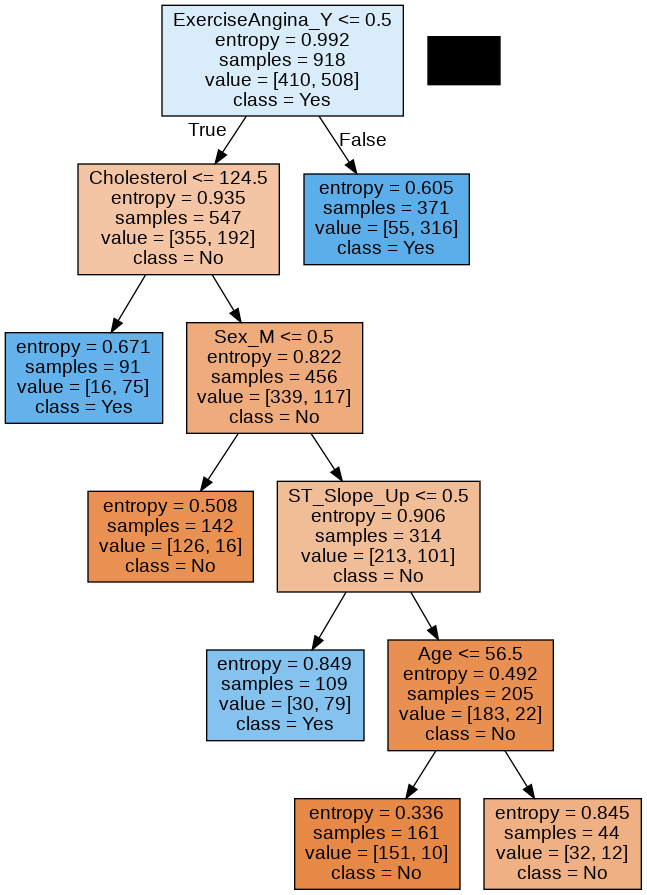

In [ ]:
graph, = print_tree(DT_classifier, features=X.columns, class_names=['No', 'Yes'])
Image(graph.create_png())

In [ ]:
classification_model = DecisionTreeClassifier(random_state=42, max_depth=3)
classification_model.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
print(classification_report(y, classification_model.predict(X))) 

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       410
           1       0.86      0.87      0.87       508

    accuracy                           0.85       918
   macro avg       0.85      0.85      0.85       918
weighted avg       0.85      0.85      0.85       918



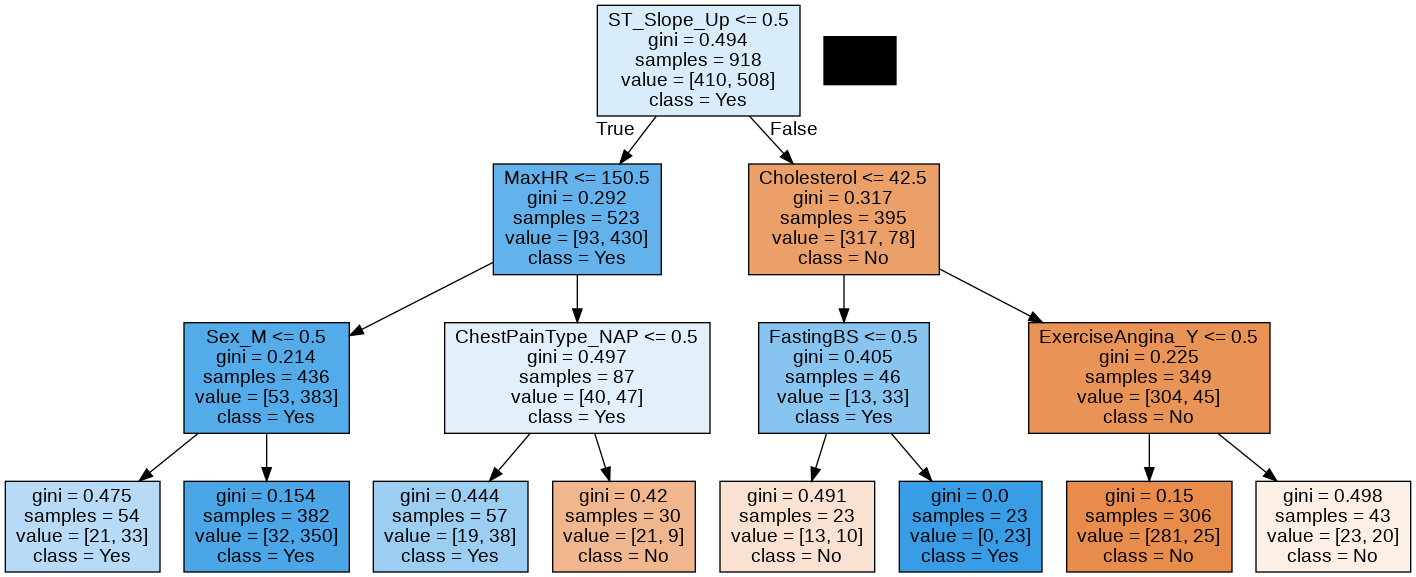

In [ ]:
graph2, = print_tree(classification_model, features=X.columns, class_names=['No', 'Yes'])
Image(graph2.create_png())

In [ ]:
classification_model.fit(X_train, y_train)
pred = classification_model.predict(X_test)

In [ ]:
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,59,16
Yes,18,91


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        77
           1       0.83      0.85      0.84       107

    accuracy                           0.82       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.82      0.81       184



In [ ]:
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# create model
model2 = DecisionTreeClassifier(max_depth=3, random_state=42)
# evaluate model
scores = cross_val_score(model2, X_train, y_train, cv=cv, n_jobs=-1)
# report performance
print('Score: %.3f (%.3f)' % (mean(scores), std(scores)))

Score: 0.833 (0.029)


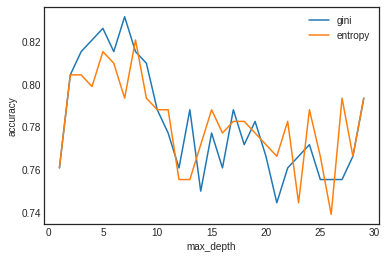

In [ ]:
from sklearn.metrics import accuracy_score
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

# **Random Forest**

In [ ]:
y = df.HeartDisease
X = df.drop('HeartDisease', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
rfc = RandomForestClassifier(max_depth=None, random_state=101)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [ ]:
rfc = RandomForestClassifier(random_state=0, n_estimators=20, max_depth=3)

rfc.fit(X_train, y_train)

predictions = rfc.predict(X_test)

print("Accuracy:",accuracy_score(y_test, predictions))


Accuracy: 0.8206521739130435


In [ ]:
def ListComp():
    return [x for x in range(1, 100)]

n_estimators = ListComp()

accuracies = [] 

for i in n_estimators:                                         
    rfc = RandomForestClassifier(n_estimators=i, random_state=0, max_depth=3)
    rfc.fit(X_train, y_train)
    predictions = rfc.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))
    
#shows the maximum accuracy
max_acc = max(accuracies)
print(classification_report(y_test, predictions))
print("Accuracy:",(max_acc))



              precision    recall  f1-score   support

           0       0.81      0.74      0.78        77
           1       0.82      0.88      0.85       107

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.82       184

Accuracy: 0.8369565217391305


In [ ]:
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# create model
model3 = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=20)
# evaluate model
scores = cross_val_score(model3, X_train, y_train, cv=cv, n_jobs=-1)
# report performance
print('Score: %.3f (%.3f)' % (mean(scores), std(scores)))

Score: 0.845 (0.027)


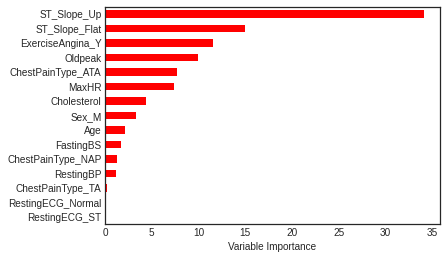

In [ ]:
Importance = pd.DataFrame({'Importance':rfc.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

***XGBoost***

In [ ]:
y = df[['HeartDisease']]
X = df.drop('HeartDisease', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model4 = XGBClassifier(random_state=0, n_jobs=-1, n_estimators=20, max_depth=3)

In [ ]:
%%time
model4.fit(X_train, y_train)

CPU times: user 44.6 ms, sys: 11 ms, total: 55.6 ms
Wall time: 42.2 ms


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(n_estimators=20, n_jobs=-1)

In [ ]:
preds = model4.predict(X_train)

In [ ]:
preds

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,

In [ ]:
print(classification_report(y, model4.predict(X)))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       410
           1       0.88      0.92      0.90       508

    accuracy                           0.88       918
   macro avg       0.88      0.88      0.88       918
weighted avg       0.88      0.88      0.88       918



In [ ]:
print(classification_report(y_test, model4.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        77
           1       0.84      0.89      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



In [ ]:
pd.DataFrame

pandas.core.frame.DataFrame

In [ ]:
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# create model
model4 = XGBClassifier(random_state=0, n_jobs=-1, n_estimators=20, max_depth=3)
# evaluate model
scores = cross_val_score(model4, X_train, y_train, cv=cv, n_jobs=-1)
# report performance
print('Score: %.3f (%.3f)' % (mean(scores), std(scores)))

Score: 0.857 (0.029)


# **Stacking**

In [ ]:
%pip install vecstack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19879 sha256=a5e421abbd74f0a222d9913104348e1b48a5085421fc859aa379b7344286cc40
  Stored in directory: /root/.cache/pip/wheels/17/89/0b/21d5484cbf713c95b641ec1bdc40dd7ae798cbdea2337e3535
Successfully built vecstack


In [ ]:
from vecstack import stacking

In [ ]:
y = df[['HeartDisease']]
X = df.drop('HeartDisease', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
models = [
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=-1),
  
    DecisionTreeClassifier(random_state=42,
                           max_depth=3),
        
    RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=20, max_depth=3),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=20, max_depth=3)
]

In [ ]:
S_train, S_test = stacking(models,                 
                           X_train, y_train.values.ravel(), X_test,
                           
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.72282609]
    fold  1:  [0.65217391]
    fold  2:  [0.67759563]
    fold  3:  [0.68306011]
    ----
    MEAN:     [0.68391393] + [0.02530926]
    FULL:     [0.68392371]

model  1:     [DecisionTreeClassifier]
    fold  0:  [0.84239130]
    fold  1:  [0.83695652]
    fold  2:  [0.84153005]
    fold  3:  [0.83606557]
    ----
    MEAN:     [0.83923586] + [0.00275981]
    FULL:     [0.83923706]

model  2:     [RandomForestClassifier]
    fold  0:  [0.85326087]
    fold  1:  [0.84239130]
    fold  2:  [0.88524590]
    fold  3:  [0.82513661]
    ----
    MEAN:     [0.85150867] + [0.02190823]
    FULL:     [0.85149864]

model  3:     [XGBClassifier]
    fold  0:  [0.88043478]
    fold  1:  [0.85869565]
    fold  2:  [0.87431694]
    fold  3:  [0.85792350]
    ----
    MEAN:     [0.86784272] + [0.00977926]
    FUL

In [ ]:
model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
    
model = model.fit(S_train, y_train.values.ravel())
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.82608696]


In [ ]:
model = DecisionTreeClassifier(random_state=42)
    
model = model.fit(S_train, y_train.values.ravel())
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.84239130]


In [ ]:
model = XGBClassifier(random_state=0,silent=True)
    
model = model.fit(S_train, y_train.values.ravel())
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.83695652]


In [ ]:
model =RandomForestClassifier(random_state=0, n_jobs=-1)
    
model = model.fit(S_train, y_train.values.ravel())
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.84239130]
